In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#force the graph to show under the line
%matplotlib inline
plt.style.use('seaborn')

In [2]:
#na_values replace the text ? with NaN
df=pd.read_csv('E:\\ITI\\Python\\Regression.csv',na_values='?')

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-

In [5]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [6]:
#fill every null with average
avg=df.mean().round(2)

In [7]:
car_df=df.loc[:,:]

In [8]:
car_df.fillna(avg,inplace=True)

In [9]:
#doors of car are missing
car_df[car_df['num-of-doors'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,122.0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [10]:
car_df[car_df['body-style']=='sedan']['num-of-doors'].value_counts()

four    79
two     15
Name: num-of-doors, dtype: int64

In [11]:
car_df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [12]:
#majority is four doors
#we also can use car_df['num-of-doors'].fillna('four') better
car_df.fillna('four',inplace=True)

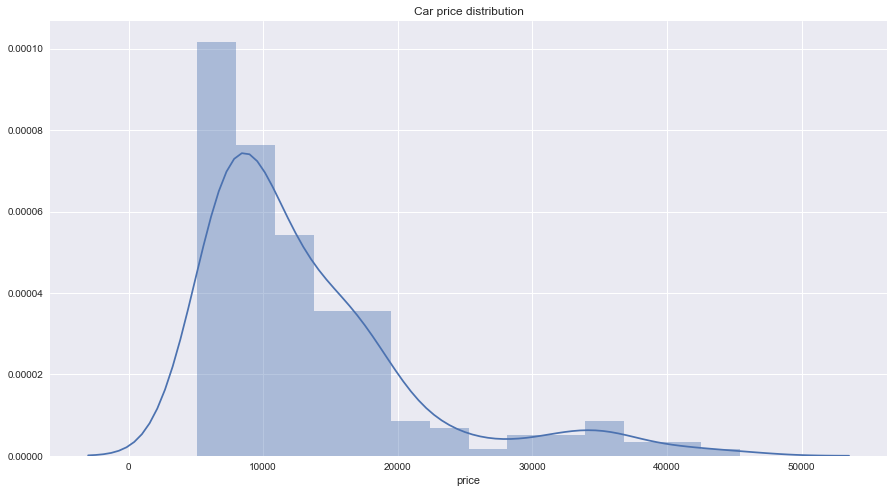

In [13]:
#control dimension of the graph
plt.figure(figsize=(15,8))
plt.title('Car price distribution')
sns.distplot(car_df.price)
#plt.show()

# positive skewed,mean cannot represent the data,we can use median


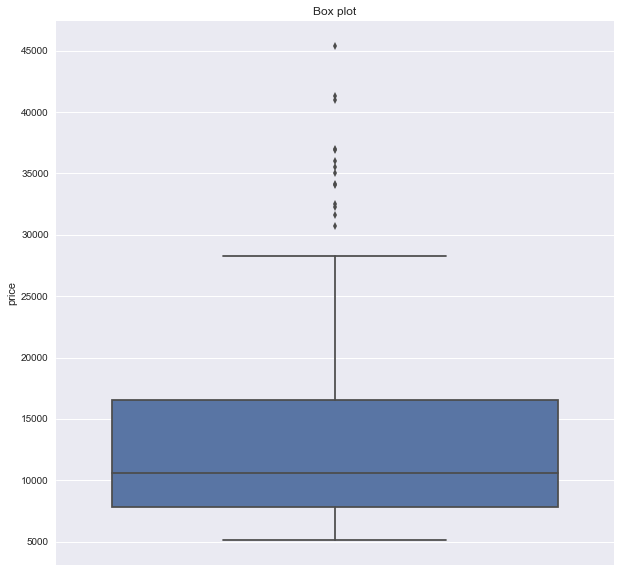

In [14]:
#we use box plot to check outliers
plt.figure(figsize=(10,10))
plt.title('Box plot')
sns.boxplot(y=car_df.price)

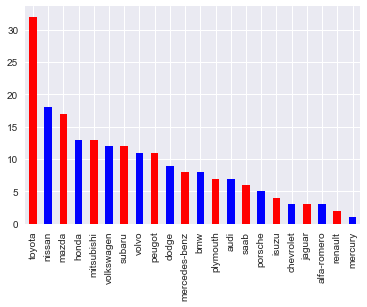

In [15]:
#see the most car bought
car_df.make.value_counts().plot.bar(color=['red','blue'])

Japanese cars were most sales

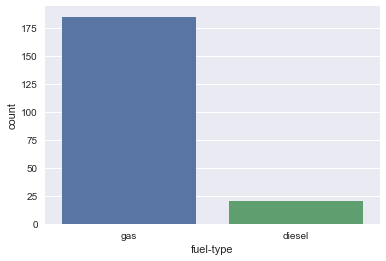

In [16]:
sns.countplot('fuel-type',data=car_df)

most cars was on gas
due to gas crisis in USA

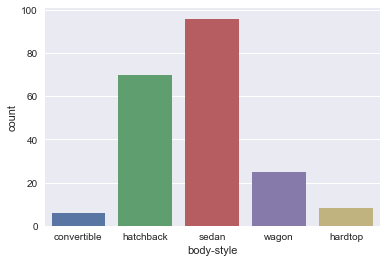

In [18]:
sns.countplot('body-style',data=car_df)

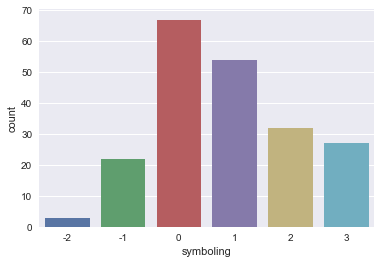

In [19]:
#count of risks
sns.countplot(car_df.symboling)

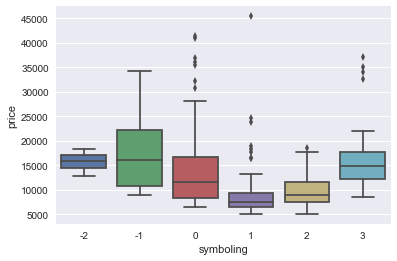

In [20]:
sns.boxplot(x='symboling',y='price', data= car_df)

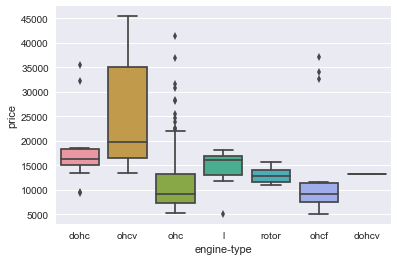

In [21]:

sns.boxplot(x='engine-type',y='price',data=car_df)

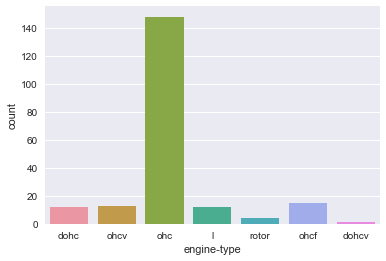

In [22]:
sns.countplot('engine-type',data=car_df)

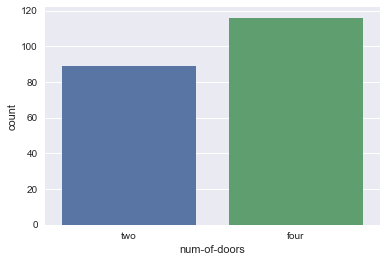

In [23]:
sns.countplot('num-of-doors',data=car_df)

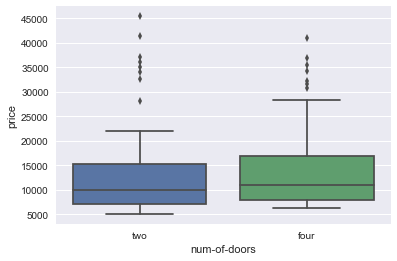

In [24]:
sns.boxplot(x='num-of-doors',y='price',data=car_df)

we can ignore number of doors as the alike


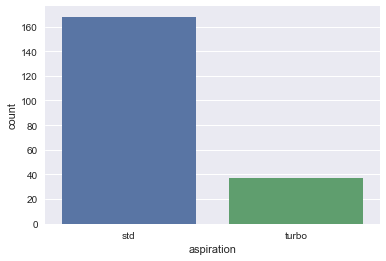

In [25]:
sns.countplot('aspiration',data=car_df)

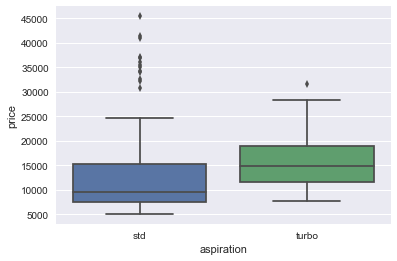

In [26]:
sns.boxplot(x='aspiration',y='price',data=car_df)

standard is cheaper

In [27]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+ ' Histogram')
    sns.countplot(x,data=car_df)
    plt.subplot(4,2,fig+1)
    plt.title(x+ ' vs price')
    sns.boxplot(x=x,y='price',data=car_df)

In [28]:
#select all categorical columns
car_df.select_dtypes(include='object').columns

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

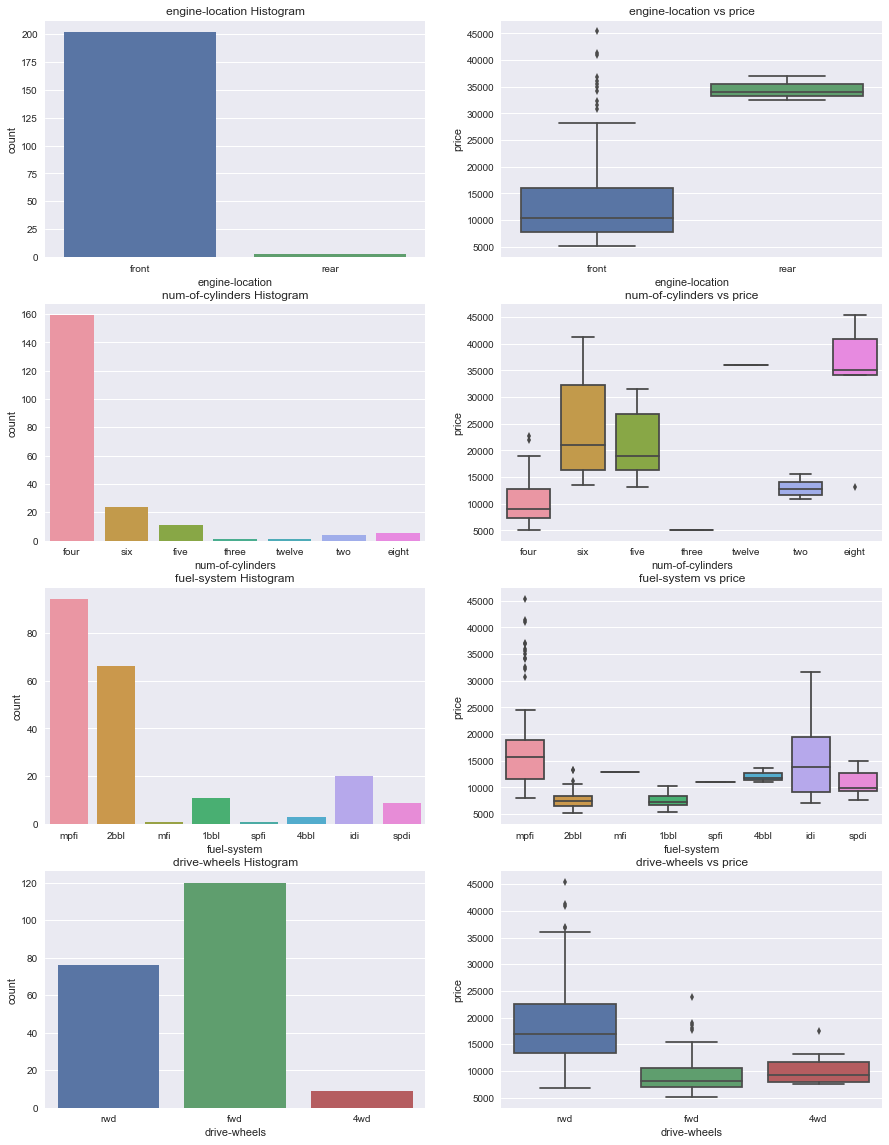

In [29]:
plt.figure(figsize=(15,20))
plot_count('engine-location',1)
plot_count('num-of-cylinders',3)
plot_count('fuel-system',5)
plot_count('drive-wheels',7)

-small number of transaction in rear engine location makes the prediction biased (if any rear --> price go up), incresae the avg so we don't select that feature
all the others is taken in the model
create a class in fuel system named others

In [30]:
#select floats
car_df.select_dtypes(include='float').columns

Index(['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'bore',
       'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'price'],
      dtype='object')

In [31]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(car_df[x],car_df['price'])
    plt.title(x + ' vs price')

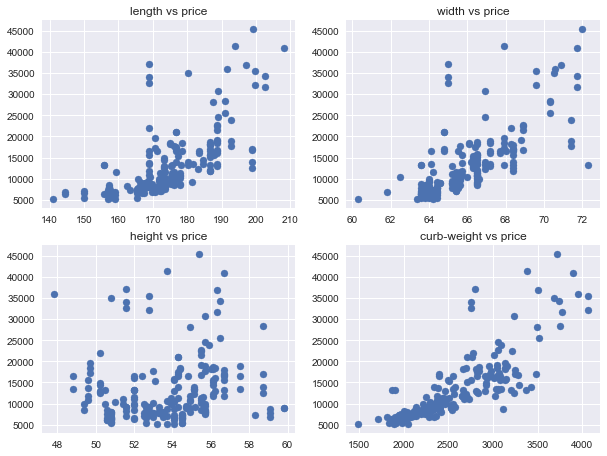

In [32]:
plt.figure(figsize=(10,20))
scatter('length',1)
scatter('width',2)
scatter('height',3)
scatter('curb-weight',4) #int not float

no corelation between height and price so we don't select it

In [33]:
def pp(x,y,z):
    sns.pairplot(car_df,x_vars=[x,y,z],y_vars='price',height=4,kind='scatter')

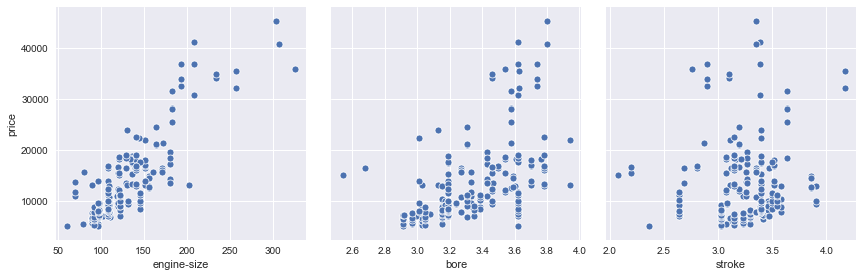

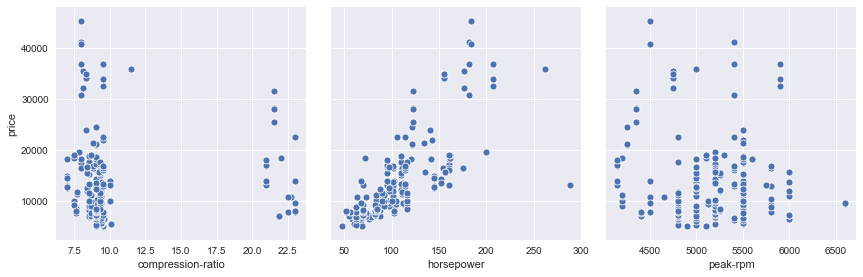

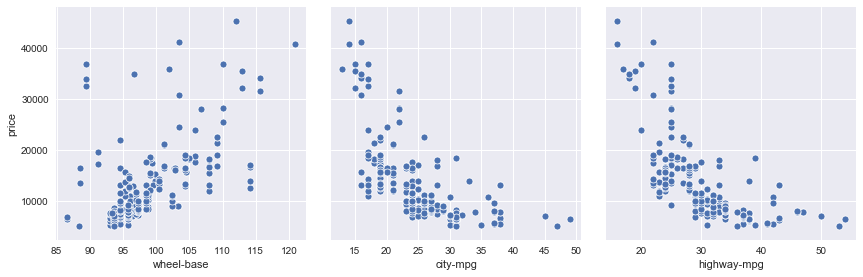

In [34]:
pp('engine-size','bore','stroke')
pp('compression-ratio','horsepower','peak-rpm')
pp('wheel-base','city-mpg','highway-mpg')

more miles per galon --> low performance

In [35]:
car_lr=car_df[['price','fuel-type','aspiration','body-style','drive-wheels','wheel-base','curb-weight','engine-type','num-of-cylinders','engine-size','bore','horsepower','length','width']]

In [36]:
len(car_lr.columns)

14

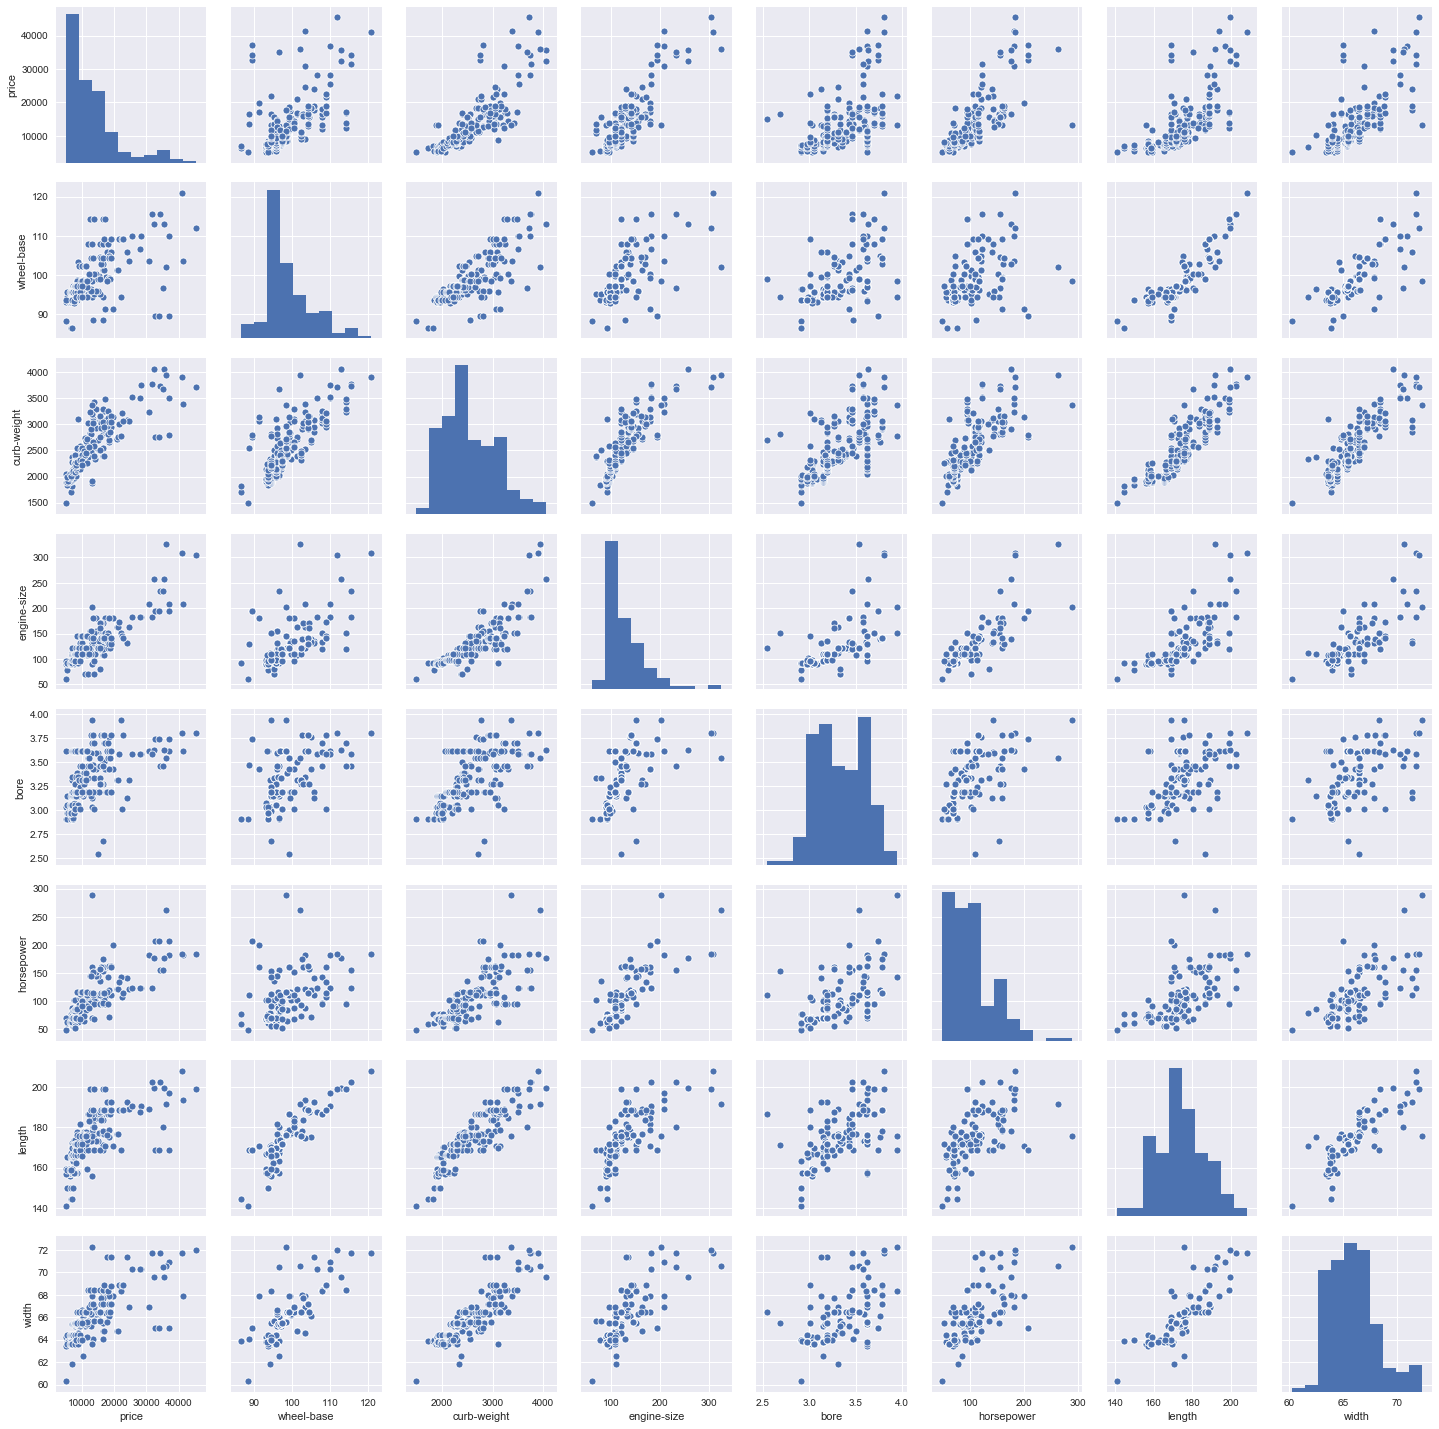

In [37]:
sns.pairplot(car_lr)

it removed the categorical so we musr retrieve them

In [64]:
obj_data=car_lr.select_dtypes(include='object')

In [67]:
#remove diesel cars
pd.get_dummies(obj_data,drop_first=True)


,fuel-type_gas,aspiration_turbo,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
6,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
7,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
9,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [68]:
obj_data.columns

Index(['fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-type',
       'num-of-cylinders'],
      dtype='object')

In [69]:
cars_lr2=pd.get_dummies(car_lr,columns=['fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-type',
       'num-of-cylinders'],drop_first=True)

In [70]:
len(cars_lr2.columns)

28

In [71]:
cars_lr2.corr()

,price,wheel-base,curb-weight,engine-size,bore,horsepower,length,width,fuel-type_gas,aspiration_turbo,...,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two
price,1.000000e+00,0.583168,0.820825,0.861752,0.532300,0.757917,0.682986,0.728699,-0.110207,0.177285,...,-0.329790,0.019024,0.394188,-0.003363,0.242697,-0.679147,0.485454,-0.071857,0.203301,-0.003363
wheel-base,5.831681e-01,1.000000,0.776386,0.569329,0.488750,0.351957,0.874587,0.795144,-0.308346,0.257611,...,-0.204037,-0.183195,0.166152,-0.081174,0.261182,-0.309492,0.145842,-0.120709,0.037803,-0.081174
curb-weight,8.208247e-01,0.776386,1.000000,0.850594,0.648480,0.750968,0.877728,0.867032,-0.217275,0.324902,...,-0.413293,-0.080295,0.400878,-0.039196,0.264554,-0.576463,0.405490,-0.143903,0.187964,-0.039196
engine-size,8.617522e-01,0.569329,0.850594,1.000000,0.583774,0.810713,0.683360,0.735433,-0.069594,0.108217,...,-0.363334,-0.016508,0.562403,-0.184762,0.144878,-0.631431,0.511783,-0.111081,0.335555,-0.184762
bore,5.322996e-01,0.488750,0.648480,0.583774,1.000000,0.575740,0.606454,0.559150,-0.054451,0.212614,...,-0.410383,0.326798,0.119509,0.000127,-0.007797,-0.164076,0.128365,-0.108774,0.054482,0.000127
horsepower,7.579165e-01,0.351957,0.750968,0.810713,0.575740,1.000000,0.554435,0.642196,0.165190,0.240182,...,-0.425696,0.043788,0.430893,0.018764,0.109921,-0.638058,0.532596,-0.099910,0.280150,0.018764
length,6.829863e-01,0.874587,0.877728,0.683360,0.606454,0.554435,1.000000,0.841118,-0.212679,0.234539,...,-0.274413,-0.118320,0.244053,-0.057877,0.259894,-0.400210,0.262981,-0.187445,0.100413,-0.057877
width,7.286988e-01,0.795144,0.867032,0.735433,0.559150,0.642196,0.841118,1.000000,-0.233880,0.300567,...,-0.286211,-0.124446,0.348869,-0.013699,0.397690,-0.523135,0.209246,-0.183473,0.153516,-0.013699
fuel-type_gas,-1.102068e-01,-0.308346,-0.217275,-0.069594,-0.054451,0.165190,-0.212679,-0.233880,1.000000,-0.401397,...,-0.020584,0.092384,0.085556,0.046383,-0.213527,0.020184,0.068594,0.023020,0.023020,0.046383
aspiration_turbo,1.772846e-01,0.257611,0.324902,0.108217,0.212614,0.240182,0.234539,0.300567,-0.401397,1.000000,...,-0.020162,-0.034450,-0.070070,-0.066203,0.225968,0.009195,-0.091987,-0.032857,-0.032857,-0.066203


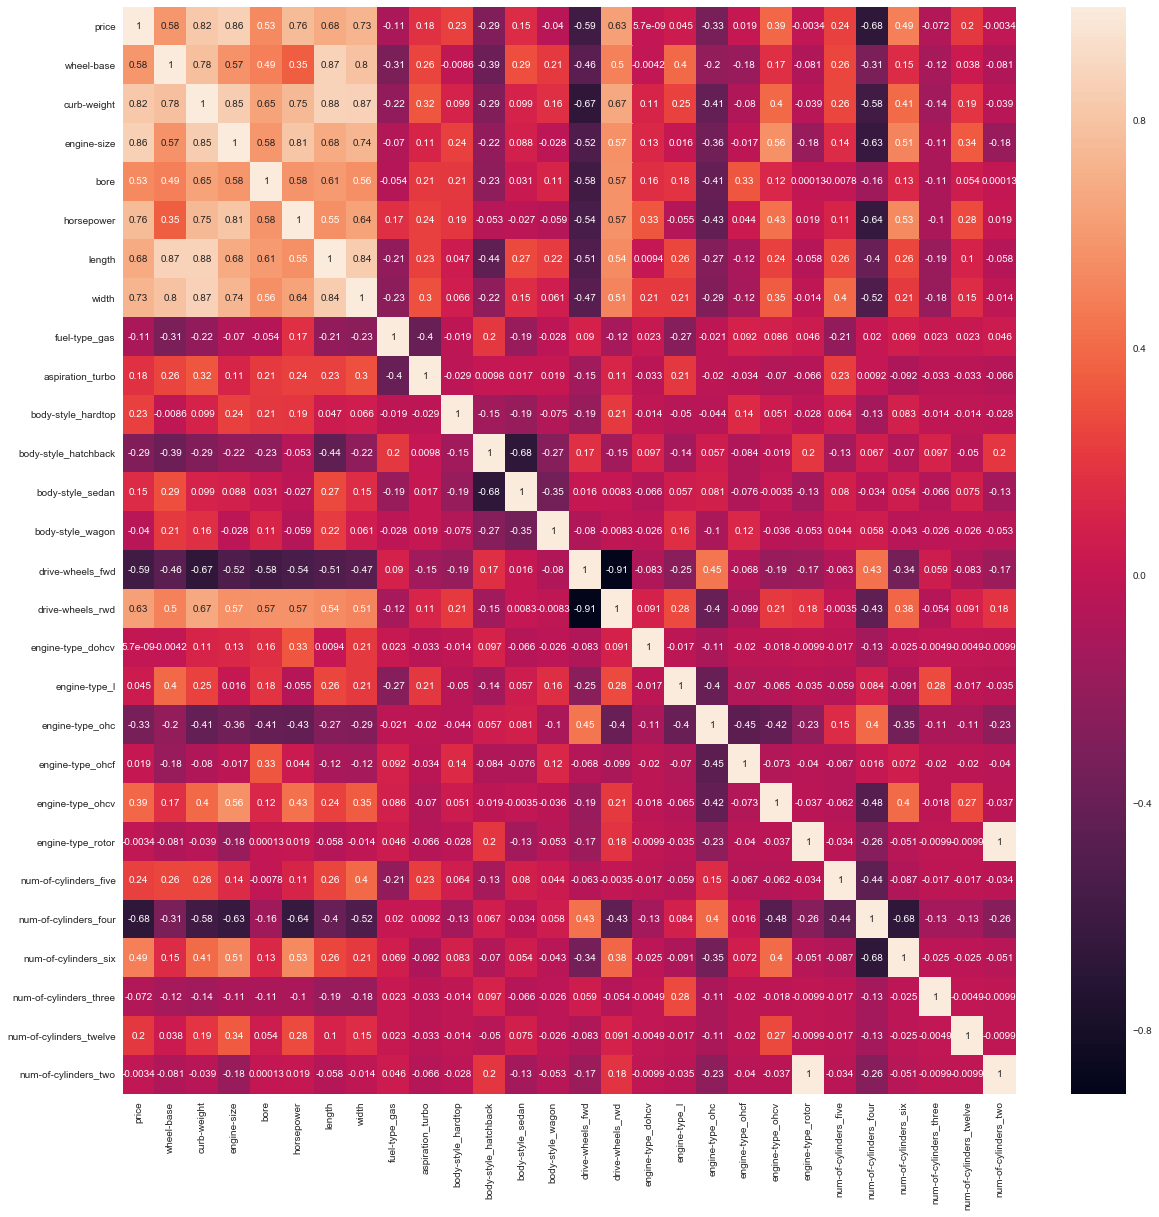

In [86]:
plt.figure(figsize=(20,20))
sns.heatmap(cars_lr2.corr(),annot=True)

check independant corelation first if it is strong pick the highest correlated with the dependant and discard the second

In [87]:
cars_lr2.columns

Index(['price', 'wheel-base', 'curb-weight', 'engine-size', 'bore',
       'horsepower', 'length', 'width', 'fuel-type_gas', 'aspiration_turbo',
       'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan',
       'body-style_wagon', 'drive-wheels_fwd', 'drive-wheels_rwd',
       'engine-type_dohcv', 'engine-type_l', 'engine-type_ohc',
       'engine-type_ohcf', 'engine-type_ohcv', 'engine-type_rotor',
       'num-of-cylinders_five', 'num-of-cylinders_four',
       'num-of-cylinders_six', 'num-of-cylinders_three',
       'num-of-cylinders_twelve', 'num-of-cylinders_two'],
      dtype='object')

In [88]:
cars_lr3=cars_lr2.drop(['wheel-base','length','curb-weight','horsepower', 'engine-type_rotor'],axis=1)

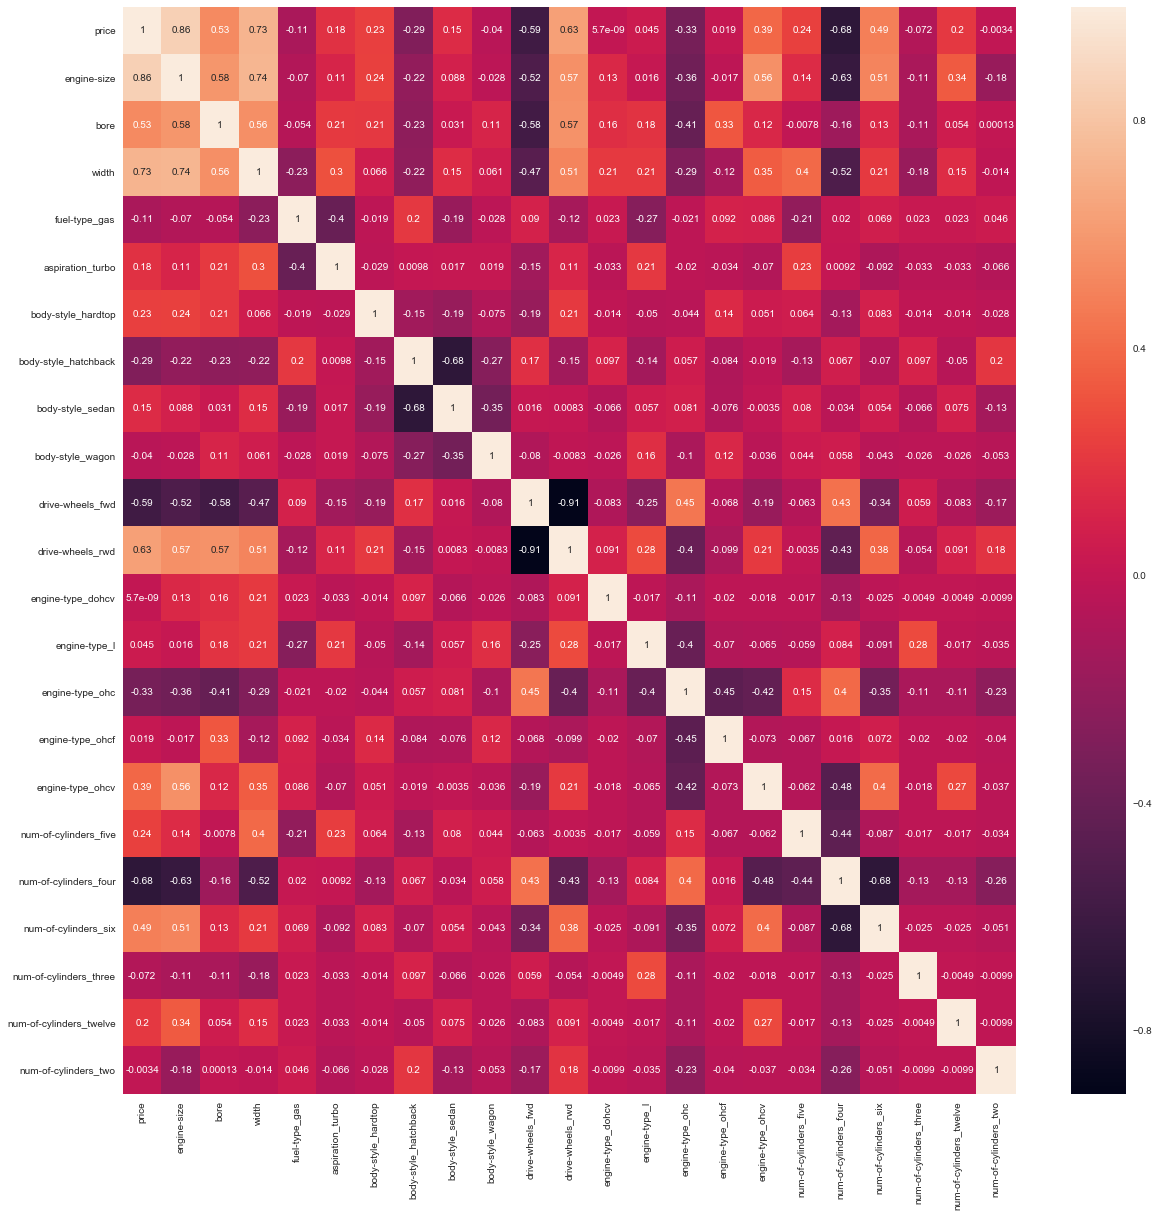

In [89]:
plt.figure(figsize=(20,20))
sns.heatmap(cars_lr3.corr(),annot=True)

In [90]:
cars_lr3.drop(['width'],axis=1,inplace=True)

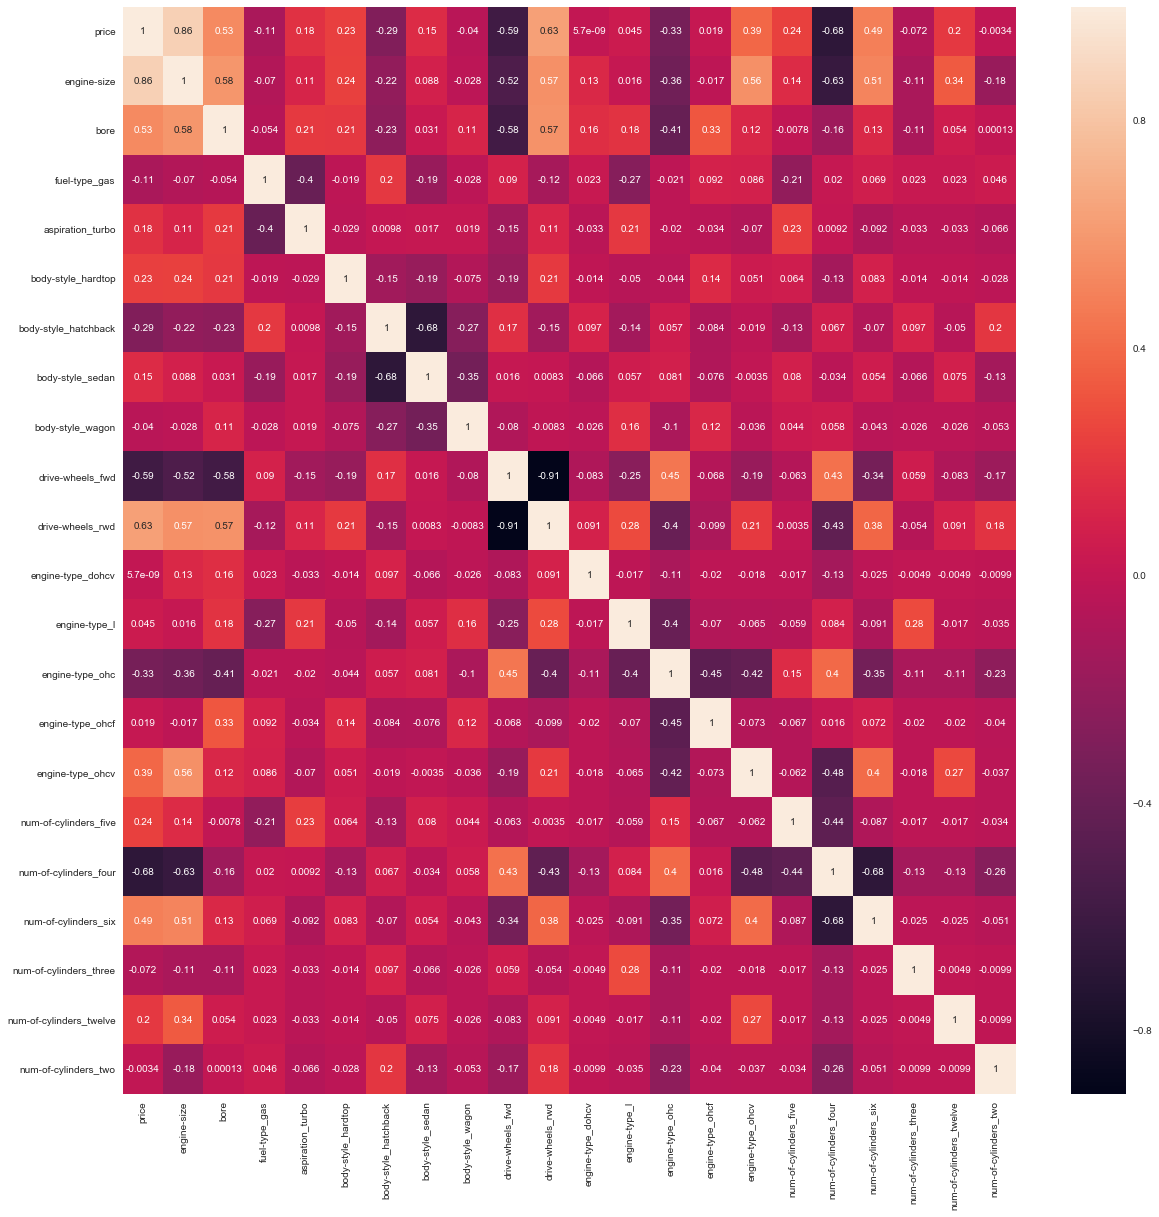

In [91]:
plt.figure(figsize=(20,20))
sns.heatmap(cars_lr3.corr(),annot=True)

In [92]:
from sklearn.preprocessing import MinMaxScaler
norm_cars=MinMaxScaler().fit_transform(cars_lr3)

In [93]:
norm_cars=pd.DataFrame(norm_cars,columns=cars_lr3.columns)

In [94]:
norm_cars

,price,engine-size,bore,fuel-type_gas,aspiration_turbo,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_fwd,...,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two
0,0.207959,0.260377,0.664286,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.282558,0.260377,0.664286,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.282558,0.343396,0.100000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.219254,0.181132,0.464286,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.306142,0.283019,0.464286,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.251527,0.283019,0.464286,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.312596,0.283019,0.464286,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.342634,0.283019,0.464286,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.465642,0.264151,0.421429,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.200813,0.264151,0.421429,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [96]:
from sklearn.model_selection import train_test_split

In [97]:
train, test=train_test_split(norm_cars, test_size=0.3)

In [100]:
train_x=train.drop('price',axis=1)
train_y=train[['price']]
test_x=test.drop('price',axis=1)
test_y=test[['price']]

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [102]:
lr=LinearRegression()

In [103]:
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
predict_y=lr.predict(test_x)

In [107]:
print('MSE :  ' ,mean_squared_error(test_y,predict_y))

MSE :   0.004938534451975834
